(768, 8) (768,)
(514, 8) (254, 8) (514,) (254,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]


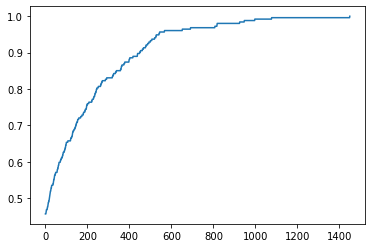

In [2]:
# example of hill climbing the test set for the diabetes dataset
from random import randint
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# load or prepare the classification dataset
def load_dataset():
    data = 'pima-indians-diabetes.csv'
    df = read_csv(data, header=None)
    data = df.values
    return data[:, :-1], data[:, -1]

# evaluate a set of predictions
# as an objective function through accuracy score
#built-in scoring from sklearn
def evaluate_predictions(y_test, yhat):
    return accuracy_score(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
    return [randint(0, 1) for _ in range(n_examples)]

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
    # copy current solution
    updated = current.copy()
    for i in range(n_changes):
        # select a point to change
        ix = randint(0, len(updated)-1)
        # flip the class label
        updated[ix] = 1 - updated[ix]
    return updated

# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    # generate the initial solution
    solution = random_predictions(X_test.shape[0])
    # evaluate the initial solution
    score = evaluate_predictions(y_test, solution)
    scores.append(score)
    # hill climb to a solution
    for i in range(max_iterations):
        # record scores
        scores.append(score)
        # stop once we achieve the best score
        if score == 1.0:
            break
        # generate new candidate
        candidate = modify_predictions(solution)
        # evaluate candidate
        value = evaluate_predictions(y_test, candidate)
        # check if it is as good or better
        if value >= score:
            solution, score = candidate, value
            #print('>%d, score=%.3f' % (i, score))
    return solution, scores

# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 5000)
# plot the scores vs iterations
pyplot.plot(scores)
pyplot.show()